# Random Forecast Classification in Python

We saw in previous code, how decision tree works. It is pretty straight-forward to understand. But one decision tree might try to a weak learner, in terms of capturing all nauances in the data. 

Hence, the concepts of "Bagging" and "Boosting" come into picture. In both technique, we combine multiple decision trees (weak learner) and build a more powerful model

<b>Bagging:</b> In such techniques, decision trees are formed parallely. And then on we prepare the final model by giving some weightage to each decision tree.

<b>Boosting:</b> Boosting tries to improve the prediction of previous decisino tree. It also takes predictors randomly but creates trees sequentially. Each tree is grown using information from previously grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.  

### Random Forest

A random sample of $m$ predictors is chosen as split candidates from the full set of $p$ predictors. The split is allowed to use only one of those $m$ predictors.

In [1]:
### Importing important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Import sklearn libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
## importing dataset

train = pd.read_csv("Data/Classification_Train.csv")

In [3]:
### As we are dealing with boolean output either 0 or 1, we will subset the dataset for have these 2 kind of outputs only.
### We won't do it in real world and try to implement any other ML method which can deal with multi-classifiers 

train = train[train['price_range'].isin([0,1])]
train.shape

(1000, 21)

In [4]:
### Let's split the data into X and y

X = train.iloc[:,:len(train.columns)-1]
y = train.iloc[:,len(train.columns)-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0


In [5]:
### Let's split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
X_train.shape

(700, 20)

In [6]:
## printing decision tree class
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [7]:
### Let's build model using the default parameters

tree_rf_clf = RandomForestClassifier()
tree_rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
y_pred = tree_rf_clf.predict(X_test)

In [9]:
## Checking accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(tree_rf_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [10]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[147   9]
 [ 16 128]]


In [11]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       156
           1       0.93      0.89      0.91       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



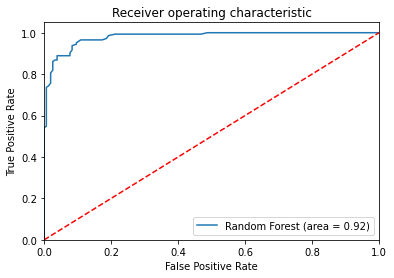

In [12]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, tree_rf_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Calculating Feature Importance

Source - https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature 0: battery_power, Score: 0.07125
Feature 1: blue, Score: 0.00460
Feature 2: clock_speed, Score: 0.02545
Feature 3: dual_sim, Score: 0.00587
Feature 4: fc, Score: 0.02087
Feature 5: four_g, Score: 0.00458
Feature 6: int_memory, Score: 0.03667
Feature 7: m_dep, Score: 0.02294
Feature 8: mobile_wt, Score: 0.03490
Feature 9: n_cores, Score: 0.01810
Feature 10: pc, Score: 0.02624
Feature 11: px_height, Score: 0.06259
Feature 12: px_width, Score: 0.06369
Feature 13: ram, Score: 0.50434
Feature 14: sc_h, Score: 0.02663
Feature 15: sc_w, Score: 0.02558
Feature 16: talk_time, Score: 0.03059
Feature 17: three_g, Score: 0.00462
Feature 18: touch_screen, Score: 0.00481
Feature 19: wifi, Score: 0.00568


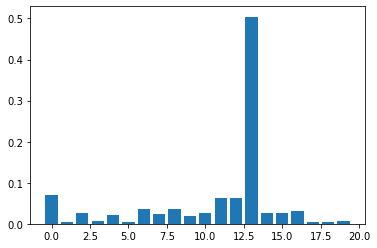

In [13]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

cols = list(X_train.columns)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature %0d: %s, Score: %.5f' % (i,cols[i],v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

We can see that RAM is the most important factor for pricing, followed by battery power. 

#### Let's try to apply GridSearch and Hyperparameter tunning

In [14]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier()

paratermers = {
    'n_estimators' : [100,500,1000],
    'max_depth' : [5,10,20]
}

rf_clf_cv = GridSearchCV(rf_clf, paratermers, cv=5)
rf_clf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [15]:
### Printing best predictor

rf_clf_cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
### Prediction and Checking accuracy

model = rf_clf_cv.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(tree_rf_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [17]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[146  10]
 [ 13 131]]


In [18]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       156
           1       0.93      0.91      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



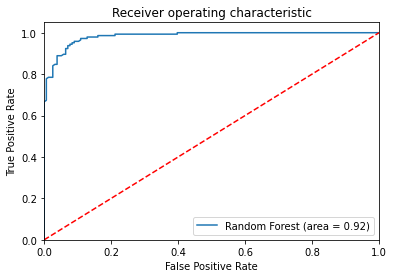

In [19]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
clf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % clf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Conclusion

We found the default model better than GridSearch one. 

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/